# Machine learning
>Machine learning is a branch of artificial intelligence which focuses on developing and using mathematical techniques that allows a software to predict an outcome given an input without explicitly programmed to do so.
>
>
Machine learning is broadly classified into two types.
- **Supervised learning**
>Input data is provided along with the output during training. Output can be predicted using the supervised learning model.
- **Un-supervised learning**
>Only input data is provided in Unsupervised Learning. Hidden patterns in the data can be found using the unsupervised learning model.
>

Let’s discuss an algorithm called **linear regression** in detail. It comes under **supervised learning**.
>
>**Note:** We will be using python programming to illustrate the algorithm discussed in this post and you can find the source code from my [github repository](https://github.com/kameshtj/Machine-Learning-Algorithms).

# Linear regression

>In Machine learning, linear regression is used to train the models `when there is a linear relationship between the inputs and outputs`.

> 

- Let's implement this alogrithm with sample dataset.
>
- We have the below dataset where `X` is an input and `Y` is an output.


| X (Input) | 1 | 2 | 3 | 4 | 5 | 6 | ... |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Y (Output) | 3 | 5 | 7 | 9 | 11 | 13 | ... |

>**Note:** This  dataset is very simple and handcrafted for the sake of demonstration. I have explained with real time dataset in the end.

- **The task is to train a model which can predict an output `Y` given an any arbitrary input `X` which is not in the data set.**
>
- Let's plot this as a graph. 


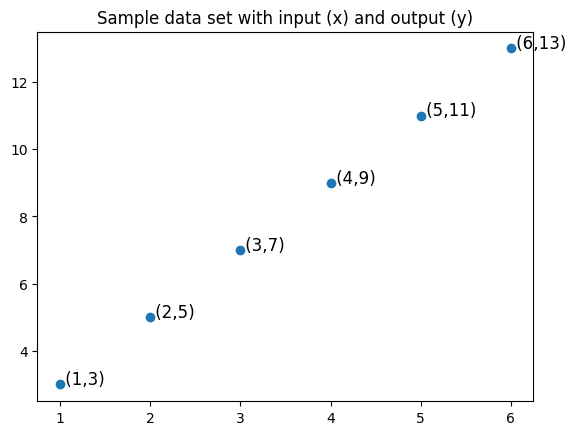

In [218]:
import numpy as np
from matplotlib import pyplot as plt

#declaring input and output of the training data set.
x = [1,2,3,4,5,6]
y = [3,5,7,9,11,13]

#plottig the input X and output Y as graph
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.set(title="Sample data set with input (x) and output (y)")
for i,j in zip(x, y): 
    ax.annotate(" ("+str(i)+","+str(j)+")",xy=(i,j), size=12)
plt.show()

- It is evident from the graph that a straight line can be fitted for the given data points. 
>
- Using extrapolation, we can find `Y` for any arbitrary input `X`. 
>
- We can define a model for fitting a straight line and use linear regression to find the parameters for the model that fits best.
>
- `Y = m * X + b`
>
where **m** and **b** are the parameters of the model.
>


>**The goal is to find the best values for the parameters (slope `m` and intercept `b` ) that minimize the error between the predicted values and the actual target values.**

>
- If you look closer, you can identify the parameters `m` and `b` that fits between input `X` and output `Y`.

- `Y = 2X + 1` where `m = 2` and `b = 1`

>
- Let’s see how we find the values `m` and `b` using linear regression.
>


# The steps for training model using linear regression are as follows:
# 1. Initialization:
- We start by initializing the values of the parameters `m` and `b` with some arbitrary values. 
>
- These values can be chosen randomly or set to zero. Let's initialize the parameters `m` and `b` in our model to zero.

In [219]:
m = 0;
b = 0;

# 2. Forward propagation:
- Evaluate the output `y_pred` using the values initialized for parameters `m` and `b`.
>
`y_pred = m * x + b`

In [220]:
y_pred = np.multiply(m, x) + b;
print(y_pred);

[0 0 0 0 0 0]


# 3. Define the loss function:
- In linear regression, the most common loss function used is the **mean squared error (MSE)**, which measures the average squared difference between the predicted values and the actual target values. 
>
- **The MSE (L) is given by:**
>
     `L = (1/n) * Σ(y_pred - y)^2`
>
- where **n** is the number of data points in the dataset
>
    `y_pred` is the predicted value for a given input `X` using the current parameter values,
>
    `y` is the actual target value corresponding to the input `X`.
>
- Let's calculate the loss between the predicted values `y_pred` and actual values `y`.

In [221]:
n = len(x);
L = sum(np.square(np.subtract(y_pred, y)))/n
print(L);

75.66666666666667


# 4. Calculate the gradients:
- The gradients represents how the loss function changes with respect to each parameter. 
>
- We need to compute the partial derivatives of the loss function with respect to the parameters `m`and `b`. 
>
- The gradients are calculated as follows: 
    - **dL/dm = (2/n) * Σ(X * (y_pred - y_actual))** - Indicates how the loss function changes when we slightly increase the value m.
    - **dL/db = (2/n) * Σ(y_pred - y_actual)** - Indicates how the loss function changes when we slightly increase the value b.
>

>**Note**: A positive gradient indicates that increasing the value of a parameter will increase the loss function, while a negative gradient indicates that increasing the value of a parameter will decrease the loss function.

In [222]:
dL_m = (2/n) * sum(x * (y_pred - y));
print(dL_m);
dL_b = (2/n) * sum(y_pred - y);
print(dL_b);

-67.66666666666666
-16.0


---
**Let's see how we arrived at the equation for the gradients dL/dm  and dL/db in detail.**

>**Note:** For readers who are not interested in the detailed differential calculus derivation, you can skip the following section without losing the overall understanding of the topic. Feel free to jump ahead to next step.

>

<div align="center">
<img src="https://programmathically.com/wp-content/uploads/2021/06/Screenshot-2021-06-13-at-15.35.02-1082x1536.png" alt= “” width="30%" height="30%">
</div>

>
- `L = (1/n) * Σ(y_pred - y_actual)^2`
>
 -   `dL/dm = (1/n) * Σ d((y_pred - y_actual)^2)/dm`

>
- when `y = x^2`, `dy/dx = 2x`
>
∴ `dL/dm = (1/n) * Σ(2 * (y_pred - y_actual) * (d(y_pred)/dm - d(y_actual)/dm))`  --- **A**
- `y_pred = m * X + b`
>
- ```d(y_pred)/dm = d(m * X + b)/dm = d(m * X)/dm + db/dm```

>
- when `y = x`, `dy/dx = 1`. Similarly, derivative of constant is always zero.

∴  ```d(y_pred)/dm = X``` --- **B**
>
- `y_actual` is constant. 
>
∴ ```d(y_actual)/dm = 0``` --- **C**
>
- By substituting the equation **B** and **C** in **A**, we get
>
∴ **dL/dM = (2/n) * Σ((y_pred- y_actual) * X)**

---
>
Similarly
- ```dL/db = (1/n) * Σ(2 * (y_pred - y_actual) * d(y_pred)/db)```
>
- ```d(y_pred)/db = d(m*X + b)/db = 1```
>
**∴ dL/db = (2/n) * Σ(y_pred - y_actual)**



# 5. Update the parameters: (Backward propagation using Gradient descent)
The parameters are updated iteratively using the gradients calculated from the above step and a learning rate `(α)` controls the step size of each update. 
>
This is the important step where we optimize the parameters `m` and `b` to reduce the loss function `L`.
>
The parameter update equations are as follows: 
- `m = m - α * dL/dm`
- `b = b - α * dL/db`
>
**Where:** 
α (alpha) is the learning rate, a small positive value that determines the step size of the update
>
- **The gradients `dL_m` and `dL_b` calculated in the above step is negative and it indicates that the loss reduces when the parameters `m` and `b` are increased.**


In [223]:
alpha = 0.01;
m = m - (alpha * dL_m);
print("updated m = ", m);

b = b - (alpha * dL_b);
print("updated b = ", b);

updated m =  0.6766666666666666
updated b =  0.16


# 6. Repeat the steps 4 and 5:
The previous steps are repeated until the loss function `L` converges to zero or threshold or a predefined number of iterations. 
>
To summarize,
1. **Initialize the parameters** with mand b in our model y_pred = m * X + b= m * X + b to zero or random values.
>
2. Calculate the **Mean square error** between predicted output y_predand actual output y.
>
3. **Calculate the gradients** dL/dm and dL/db which indicates how the loss function changes when we slightly increase the parameter values mand b 
>
4. Using the gradients calculated from the above step, **update the parameter values** m and b where the parameter values are increased if the gradient is negative using the equation, m = m - α * dL/dm
>
5. **Repeat the above steps** with updated parameter values until the loss converges towards zero or a predefined number of iterations.
>
Let's train the model by repeating the steps for 100 times in the loop and see how the loss converges.

Loss at the end of the training 0.023819359608382714
Updated m =  2.0818800902162136
Updated b =  0.6494550806075945


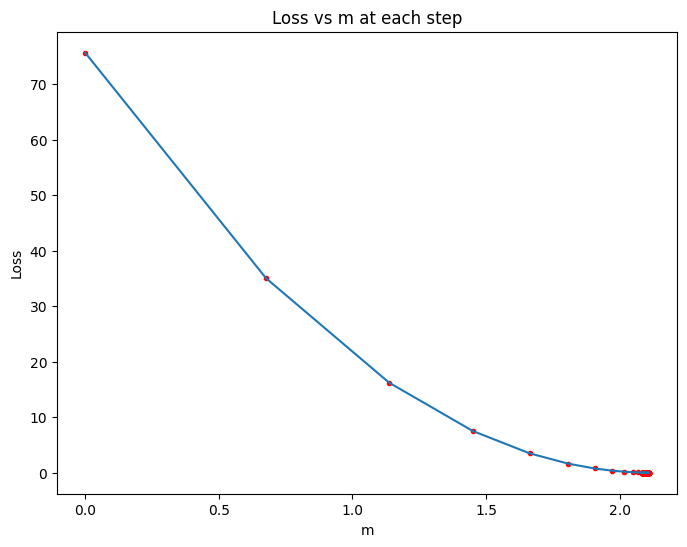

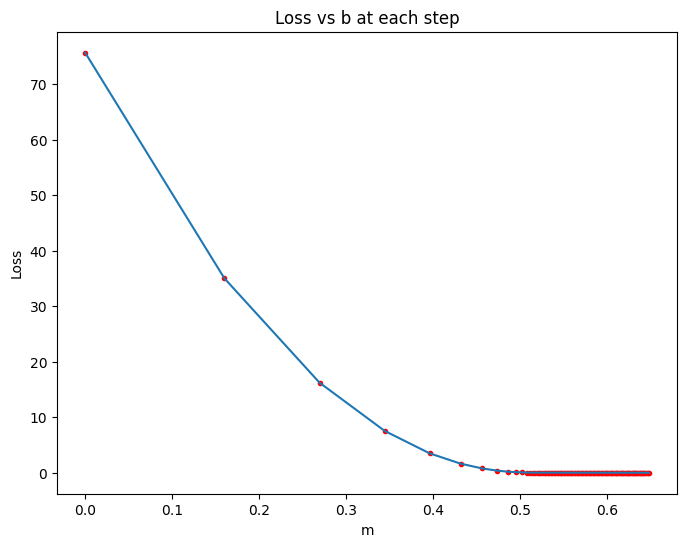

In [224]:
def train(x, y, m, b, epoch, alpha=0.01):
    
    cost_at_each_step = []
    m_at_each_step = []
    b_at_each_step = []
    
    for i in range(epoch):
        #forward propagation
        y_pred = np.multiply(x, m) + b;

        #Computing loss (MSE)
        L = sum(np.square(np.subtract(y_pred, y)))/n;

        cost_at_each_step.append(L)

        #calculate the gradients
        dL_m = (2/n) * sum(x * (y_pred - y)) ;

        dL_b = (2/n) * sum(y_pred - y) ;

        m_at_each_step.append(m)
        b_at_each_step.append(b)

        #update the parameters
        m = m - (alpha * dL_m);

        b = b - (alpha * dL_b);
        
    
    print("Loss at the end of the training", L);
    print("Updated m = ", m);
    print("Updated b = ", b);    

    #plot the graph between parameter m and loss function L at each step
    plt.figure(figsize = (8,6))
    plt.plot(m_at_each_step, cost_at_each_step)
    plt.scatter(m_at_each_step, cost_at_each_step, marker='.', color='red')
    plt.title("Loss vs m at each step")
    plt.ylabel("Loss")
    plt.xlabel("m")
    plt.show()
    
    #plot the graph between parameter m and loss function L at each step
    plt.figure(figsize = (8,6))
    plt.plot(b_at_each_step, cost_at_each_step)
    plt.scatter(b_at_each_step, cost_at_each_step, marker='.', color='red')
    plt.title("Loss vs b at each step")
    plt.ylabel("Loss")
    plt.xlabel("m")
    plt.show()

train(x, y, m=0, b=0, epoch=100);

- The above graphs indicates how the parameters m and b are tuned and loss moved towards zero at each step.
>
- Also the parameters m and b are optimized to `m=2.0818800902162136` and `b=0.6494550806075945` which is closer to the expected values `m=2` and `b=1`.
> 
- Let's change the learning rate `alpha` from `0.01` from `0.06` and how the gradient steps overshoots.

Loss at the end of the training 0.0006164560288729731
Updated m =  2.012483278426452
Updated b =  0.9446956990677258


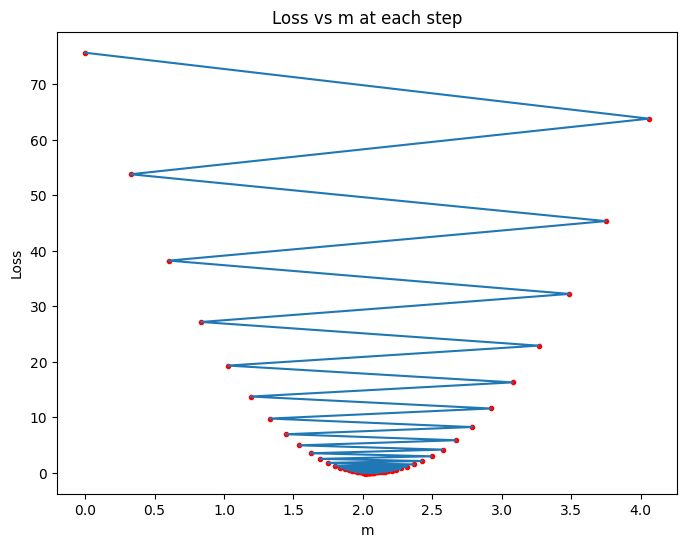

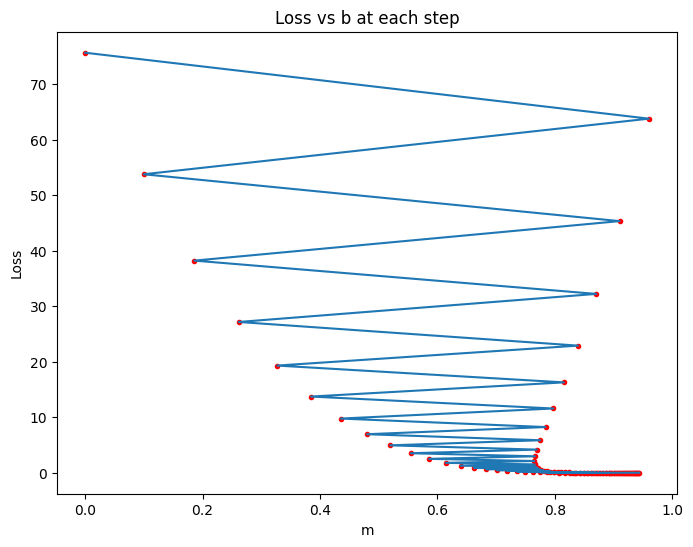

In [225]:
train(x, y, m=0, b=0, alpha=0.06, epoch=100)

- The above plot shows how the parameters updated and loss shuffles at each step when the learning rate is high. 
>
- Though the model parameters converged faster in our case, higher learning rate might prolong the optimization and sometimes the loss functions fails to converge.
>
- Similarly if the learning rate is very low, it takes more number of iteration to converge.
>
- So we should trade off the learning rate between the extremes.

# Multivariate Linear regression:
- The model that we explained here is called **univariate linear regression** because the output `Y` depends only on one input `X`.
>
- We can also train models whose output `Y` dependending on multiple inputs `X1, X2, X3, ......, Xn`. 
> 
- The algorithm used for training models for such data set is called **multivariate Linear regression**. But the key concepts remains the same.

>
- Also it is evident that the dataset is the key for supervised learning.
>
- Let's implement multivariate linear regression for the housing price prediction open source data set.

# Housing price dataset:
- The data set is available in [kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).
>
- It contains the details of the properties such as `location and age of the property, distance to the nearest train station, nearby stores, etc... and its price`.
>
>**The problem statement is to predict the value of the asset given the details of the properties.**


In [226]:
import pandas as pd

housing = pd.DataFrame(pd.read_csv("RealEstate.csv"))
housing.drop(["No"], axis=1, inplace = True)
housing.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


- We have five inputs `X1, X2,...., X5` and an output `Y`.
>
>**Let's transform the input features `X1,X2,...,X5` by scaling them into the range `0` to `1`.** 
>
>**This process is called `Normalization` and it is usually done to avoid the high range inputs dominating the training weights.**
>
- Also let's split the dataset for training and validation.
>
- We will train the model using training data and evaluate the model using validation data. This will be usually done to avoid overfitting the model to the training data.

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'];
housing[num_vars] = scaler.fit_transform(housing[num_vars])

housing.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,43.1


In [228]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

Y_train = df_train.pop('Y house price of unit area').to_numpy();
X_train = df_train.to_numpy()

Y_test = df_test.pop('Y house price of unit area').to_numpy();
X_test = df_test.to_numpy()

# The model for the multivariate linear regression is as follows.

>
- `Y = m[1] * X[1] + m[2] * X[2] + ..... +m[n] * X[n] + b`
>
where `n` is the number of inputs
>
`m` and `b` are the parameters.
>
- The number of model parameters `m` will be equal to the number of inputs `X`.

# The training steps for the multivariate linear regression is as follows.

- It will be similar to the steps in univariate linear regression.
>
1. ### Forward Propagation:
`Y_pred = m[1] * X[1] + m[2] * X[2] + ..... +m[5] * X[5] + b`
---
2. ### Loss function:
`L = (1/n) * Σ(Y_pred - Y_actual)^2`
---
3. ### Calculate the gradients:
- Since we have parameters `m[i]` associated for each of the ith input `X`, the gradients are calculated as follows: 
>
`dL/dm(i) = (2/n) * Σ(X[i] * (y_pred - y_actual))`
>
Indicates how the loss function changes when the parameters associated with each input changes.
>
`dL/db = (2/n) * Σ(y_pred - y_actual)`
>
Indicates how the loss function changes when the bias parameter `b` changes.
---
4. ### Update the parameters:
The parameter update equations are as follows: 
- `m[i] = m[i] - α * dL/dm(i)`
- `b = b - α * dL/db`
---
5. ### Repeat the steps 3 and 4 for defined number of epochs:
>
Let's implement the above mentioned steps into a function and train the housing price prediction data set.

In [229]:
def train_multi_variate_regression(x, y, m, b, epoch, alpha=0.01):
    
    for i in range(epoch):
        #forward propagation
        y_pred = np.matmul(x, m) + b;
            
        #Computing loss (MSE)
        L = sum(np.square(np.subtract(y_pred, y)))/n;

            
        #calculate the gradients
        dL_m = (2/n) * sum( np.matmul(np.transpose(x), np.subtract(y_pred, y))) ;

        dL_b = (2/n) * sum(np.subtract(y_pred, y)) ;

        #update the parameters
        m = m - (alpha * dL_m);

        b = b - (alpha * dL_b);
        
    
    print("Loss at the end of the training", L);
    print("Updated m = ", m);
    print("Updated b = ", b);  
    
    return m, b;

    

m = np.array([0,0,0,0,0,0])
b = 0;
m, b = train_multi_variate_regression(X_train, Y_train, m, b, epoch=10000, alpha=0.001);

Loss at the end of the training 8949.990282355513
Updated m =  [7.44713681 7.44713681 7.44713681 7.44713681 7.44713681 7.44713681]
Updated b =  18.433885481660813


- The model is trained for `10000` iterations at learning rate `0.001`.
>
- I arrived at these values after trying with different learning rates and the loss converges around `8950` approximately. 
>
- Let's see how it predicts the output for the validation dataset.

In [230]:
y_pred = np.matmul(X_test, m) + b;

report = pd.DataFrame(X_test, columns=['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])
report['Y house price of unit area'] = Y_test;
report['Y_pred Predicted house price of unit area'] = y_pred;
report.head(15)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Y_pred Predicted house price of unit area
0,0.909389,0.310502,0.072525,0.5,0.400873,0.688376,48.0,39.894036
1,0.909389,0.093607,0.328556,0.3,0.374697,0.423873,31.3,36.531335
2,0.818777,0.146119,0.010375,0.9,0.512118,0.750162,59.5,41.799660
3,0.090611,0.785388,0.075705,0.6,0.671474,0.749191,34.1,40.569525
4,0.545852,0.025114,0.026328,0.6,0.407659,0.726332,48.6,35.795278
5,0.363537,0.410959,0.215241,0.1,0.239336,0.812379,26.6,34.381568
6,0.090611,0.294521,0.035152,0.7,0.411900,0.748760,39.3,35.420391
7,0.545852,0.025114,0.026328,0.6,0.407659,0.726332,45.1,35.795278
8,0.727074,0.000000,0.041706,0.6,0.549806,0.766120,69.7,38.427264
9,0.818777,0.191781,0.299977,0.1,0.273994,0.876429,23.5,37.505693


- From the above report, we can the see the predicted output close to the actual output.
>
- The loss couldn't be optimized further using linear regression. There might be a non-linearity in the relationship between the inputs and the output. 
>
>**Linear regression is not good at fitting the datasets containing the non-linear relationships.**
>
- We can use deep learning techniques like multi-layer perceptrons to train datasets with non-linear relationships.
> 
- [Universal Approximation Theorem](https://medium.com/analytics-vidhya/you-dont-understand-neural-networks-until-you-understand-the-universal-approximation-theorem-85b3e7677126) is the fundamental concept behind deep learning algorithms.
>
**Note:** The source code for all examples in the article is available on my [GitHub repository](https://github.com/kameshtj/Machine-Learning-Algorithms).
 

**Happy learning !**